In [176]:
import pandas as pd
import matplotlib.pyplot as plt

In [168]:
df = pd.read_html('https://www.statistik-bw.de/Wohnen/WkostenVerhaeltnis/99045041.tab?R=KR111',
                  thousands='.',
                  decimal=',',
                  encoding='utf-8')

df_amount = pd.DataFrame(df[0].iloc[:-2,[1, 3, 5, 7]].values,
                         columns=['Buildings [-]', 'Flats [-]', 'Rooms [-]', 'Denstity [p/b]'],
                         index=df[0].iloc[:-2,[0]].values.flatten())
df_amount.index.names = ['Year']
df_amount = df_amount.astype({'Buildings [-]': int, 
                              'Flats [-]': int,
                              'Rooms [-]' : int,
                              'Denstity [p/b]' : float})
display(df_amount.info())
df_amount.index = df_amount.index.astype(int)
df_amount.index = pd.to_datetime(df_amount.index, format='%Y')
df_amount

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 2004 to 2021
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Buildings [-]   18 non-null     int32  
 1   Flats [-]       18 non-null     int32  
 2   Rooms [-]       18 non-null     int32  
 3   Denstity [p/b]  18 non-null     float64
dtypes: float64(1), int32(3)
memory usage: 504.0+ bytes


None

,Buildings [-],Flats [-],Rooms [-],Denstity [p/b]
Year,,,,
2004-01-01,71549,292359,1154589,2.0
2005-01-01,71771,293068,1158053,2.0
2006-01-01,72040,294288,1163090,2.0
2007-01-01,72431,295004,1167075,2.0
2008-01-01,72723,296084,1171926,2.0
2009-01-01,72964,297164,1177401,2.0
2010-01-01,73339,301931,1118711,2.0
2011-01-01,73618,302740,1122999,2.0
2012-01-01,73842,304133,1128241,2.0


In [169]:
df = pd.read_html('https://www.statistik-bw.de/BevoelkGebiet/Bevoelkerung/01515020.tab?R=KR111',
                  thousands='.',
                  decimal=',',
                  encoding='utf-8')

df_population = pd.DataFrame(df[0].iloc[:-2,[2, 3]].values,
                             columns=['Population [-]', 'Density [p/km²]'],
                             index=df[0].iloc[:-2,[0]].values.flatten())
df_population = df_population[~df_population.index.str.contains('\*')]

df_population.index.names = ['Year']
df_population = df_population.astype({'Population [-]' : int, 
                                      'Density [p/km²]' : float})
df_population.rename(index={'20164)': '2016'},
                     inplace=True)
df_population.index = df_population.index.astype(int)
df_population.index = pd.to_datetime(df_population.index, format='%Y')

display(df_population.info())
df_population

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 1961-01-01 to 2020-01-01
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Population [-]   60 non-null     int32  
 1   Density [p/km²]  60 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 1.2 KB


None

,Population [-],Density [p/km²]
Year,,
1961-01-01,637299,3075.0
1962-01-01,639103,3084.0
1963-01-01,634713,3063.0
1964-01-01,631754,3049.0
1965-01-01,629364,3037.0
1966-01-01,625258,3018.0
1967-01-01,613775,2962.0
1968-01-01,617472,2980.0
1969-01-01,628412,3033.0


In [170]:
"""https://de.statista.com/statistik/daten/studie/535218/umfrage/mietpreise-auf-dem-wohnungsmarkt-in-stuttgart/"""
df = pd.read_excel('statistic_id535218_mietpreise-auf-dem-wohnungsmarkt-in-stuttgart-bis-2022.xlsx',
                   sheet_name=['Daten'],
                   skiprows=4,
                   header=0,
                   usecols=[1, 2],
                   index_col=0,
                   names=['Quarter', '€/m²'],
                   nrows=73)
df['Daten'].index = pd.to_datetime(df['Daten'].index.str[3:] + '-' + df['Daten'].index.str[0:2])
df_price = df['Daten'].resample('1Y').last()
df_price


,€/m²
Quarter,
2004-12-31,7.98
2005-12-31,7.78
2006-12-31,7.80
2007-12-31,7.98
2008-12-31,8.09
2009-12-31,8.31
2010-12-31,8.45
2011-12-31,8.54
2012-12-31,9.18


In [204]:
df_price.index

DatetimeIndex(['2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31',
               '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31', '2021-12-31', '2022-12-31'],
              dtype='datetime64[ns]', name='Quarter', freq='A-DEC')

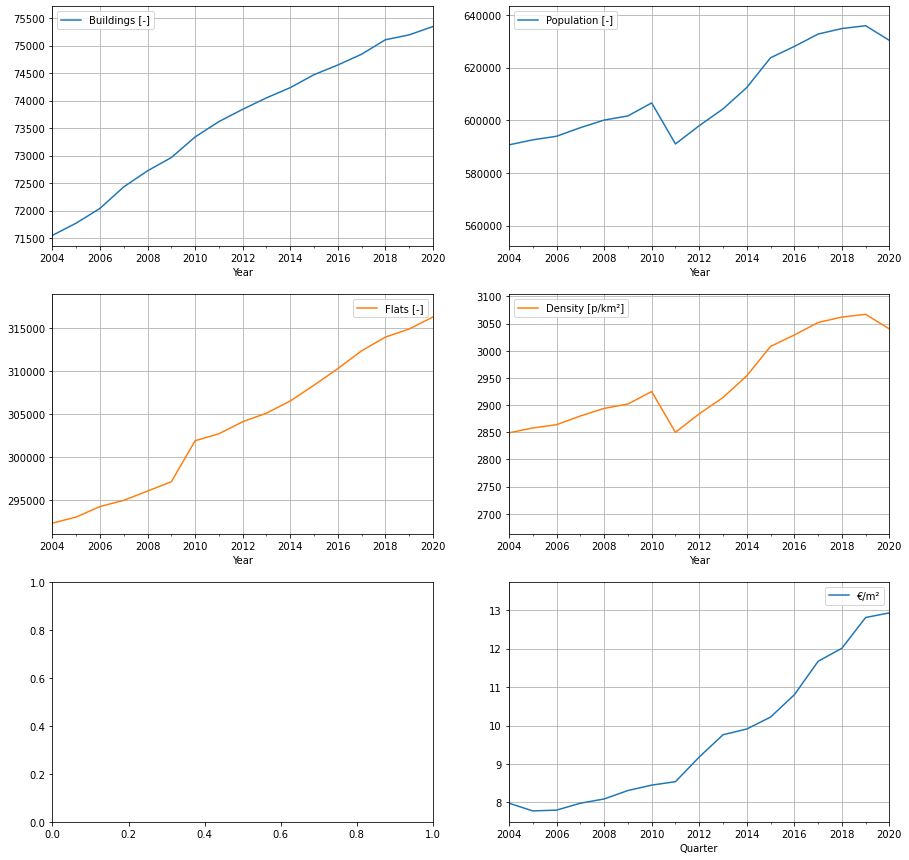

In [179]:
_, ax = plt.subplots(3, 2, figsize=(15,15))
xlims=[date(2004, 1, 1), date(2020, 12, 31)]

df_amount.plot(y=['Buildings [-]', 'Flats [-]'],
               subplots=True,
               ax=[ax[0][0], ax[1][0]],
               xlim=xlims,
               grid=True) ;

df_population.plot(subplots=True,
                   ax=[ax[0][1], ax[1][1]],
                   xlim=xlims,
                   grid=True) ;

df_price.plot(ax=ax[2][1],
              xlim=xlims,
              grid=True) ;

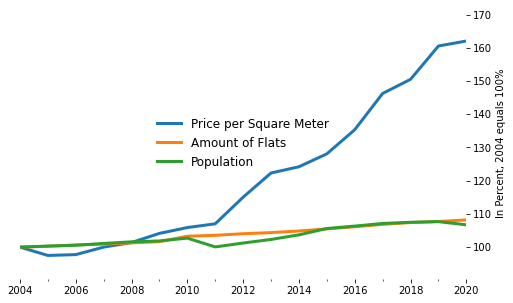

In [252]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))
xlims=[pd.to_datetime('2004-01-01'), pd.to_datetime('2020-01-01')]

s_relative_flats = (df_amount['Flats [-]'] / df_amount['Flats [-]'][0]) * 100
s_relative_population = df_population['Population [-]'] / df_population.loc[xlims[0], ['Population [-]']].values * 100
s_relative_price = (df_price['€/m²'] / df_price['€/m²'][0]) * 100


s_relative_price.plot(ax=ax,
                      linewidth=3,
                      label='Price per Square Meter');
s_relative_flats.plot(ax=ax,
                      linewidth=3,
                      label='Amount of Flats');
s_relative_population.plot(ax=ax,
                           linewidth=3,
                           label='Population');

ax.set_xlim(xlims);

ax.spines['top'].set_visible(False);
ax.spines['right'].set_visible(False);
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False);

#ax.grid(axis='y');
ax.set_ylabel('In Percent, 2004 equals 100%')
ax.set_xlabel('')

ax.legend(loc=10,
          frameon=False,
          prop={'size': 12});

ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

#ax.set_title('Population, Living Space and\nSquare meter rent in Stuttgart',
#             fontsize = 16);

fig.savefig('population.png', dpi=300)